In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Load the dataset
energy_data = pd.read_csv('energy.csv')

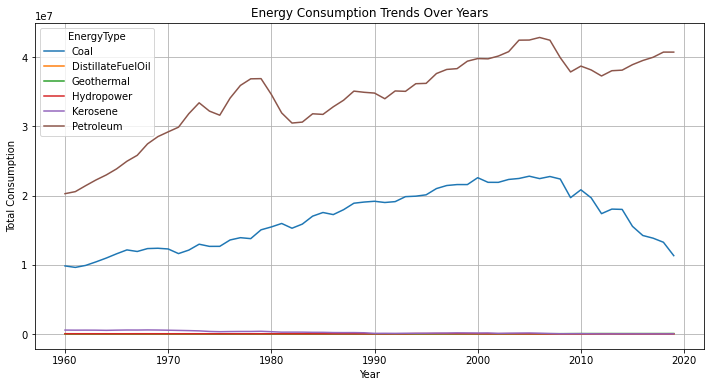

In [3]:

# Example: Aggregate consumption data for coal, natural gas, and petroleum
energy_types = ['Coal', 'Petroleum', 'Kerosene', 'Hydropower', 'DistillateFuelOil', 'Geothermal']
consumption_data = pd.DataFrame()

for energy in energy_types:
    # Summing up consumption for each energy type across all sectors, and then aggregating by year
    temp = energy_data.filter(regex=f'Consumption.*{energy}').sum(axis=1)
    temp = pd.DataFrame({'Year': energy_data['Year'], 'EnergyType': energy, 'Consumption': temp})
    consumption_data = pd.concat([consumption_data, temp], ignore_index=True)

# Aggregating by year and energy type
consumption_data = consumption_data.groupby(['Year', 'EnergyType']).sum().reset_index()

# Pivot data for plotting
pivot_data = consumption_data.pivot(index='Year', columns='EnergyType', values='Consumption')

# Plotting
pivot_data.plot(kind='line', figsize=(12, 6))
plt.title('Energy Consumption Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Total Consumption')
plt.grid(True)
plt.show()


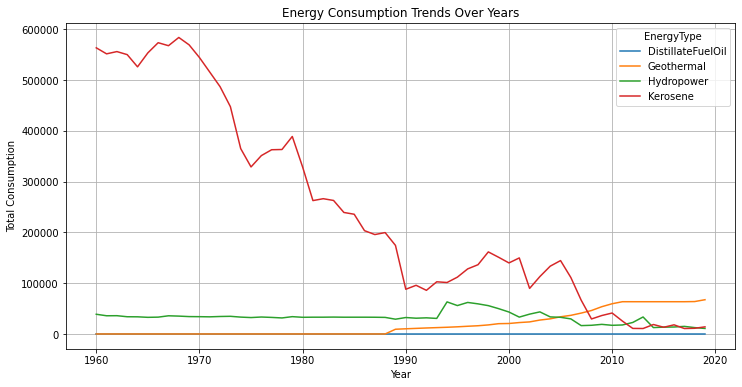

In [4]:

# Example: Aggregate consumption data for coal, natural gas, and petroleum
energy_types = ['Kerosene', 'Hydropower', 'DistillateFuelOil', 'Geothermal']
consumption_data = pd.DataFrame()

for energy in energy_types:
    # Summing up consumption for each energy type across all sectors, and then aggregating by year
    temp = energy_data.filter(regex=f'Consumption.*{energy}').sum(axis=1)
    temp = pd.DataFrame({'Year': energy_data['Year'], 'EnergyType': energy, 'Consumption': temp})
    consumption_data = pd.concat([consumption_data, temp], ignore_index=True)

# Aggregating by year and energy type
consumption_data = consumption_data.groupby(['Year', 'EnergyType']).sum().reset_index()

# Pivot data for plotting
pivot_data = consumption_data.pivot(index='Year', columns='EnergyType', values='Consumption')

# Plotting
pivot_data.plot(kind='line', figsize=(12, 6))
plt.title('Energy Consumption Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Total Consumption')
plt.grid(True)
plt.show()

In [5]:
import plotly.graph_objects as go

# Load the dataset
file_path = 'energy.csv'  # Update with the correct path to your CSV file
energy_data = pd.read_csv(file_path)

# Prepare your data as previously described and create your pivot_data DataFrame
energy_types = ['Coal', 'Petroleum', 'Kerosene', 'Hydropower', 'DistillateFuelOil', 'Geothermal']
pivot_data = consumption_data.pivot(index='Year', columns='EnergyType', values='Consumption')

# Create a Plotly figure
fig = go.Figure()

# Add traces for each energy type
for energy_type in pivot_data.columns:
    fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data[energy_type],
                             mode='lines', name=energy_type))

# Define buttons for adjusting y-axis range
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["yaxis.range", [0, 10000]],  # Adjust the range as necessary
                    label="Low Range",
                    method="relayout"
                ),
                dict(
                    args=["yaxis.range", [10000, 50000]],  # Adjust the range as necessary
                    label="Medium Range",
                    method="relayout"
                ),
                dict(
                    args=["yaxis.range", [50000, 100000]],  # Adjust the range as necessary
                    label="High Range",
                    method="relayout"
                ),
                dict(
                    args=["yaxis.autorange", True],
                    label="Auto Range",
                    method="relayout"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Update layout for a better display
fig.update_layout(
    title='Energy Consumption Trends Over Years',
    xaxis_title='Year',
    yaxis_title='Total Consumption',
)

# Show the figure
fig.show()


In [6]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'energy.csv'  # Make sure to update this path
energy_data = pd.read_csv(file_path)

# Columns representing different types of renewable energy consumption
renewable_energy_columns = [
    'Consumption.Commercial.Solar', 'Consumption.Industrial.Solar',
    'Consumption.Commercial.Wind', 'Consumption.Industrial.Wind',
    'Consumption.Commercial.Hydropower', 'Consumption.Industrial.Hydropower',
    'Consumption.Commercial.Geothermal', 'Consumption.Industrial.Geothermal',
    'Consumption.Commercial.Wood', 'Consumption.Industrial.Wood',
    'Consumption.Electric Power.Wood', 'Consumption.Residential.Wood'
]

# Aggregate renewable energy consumption data
energy_data['Total.Renewable.Consumption'] = energy_data[renewable_energy_columns].sum(axis=1)

# Pivot data for heatmap
heatmap_data = energy_data.pivot_table(index='State', columns='Year', values='Total.Renewable.Consumption', aggfunc='sum')

# Use Plotly to create an interactive heatmap
fig = px.imshow(
    heatmap_data.T,  # Transpose the data for proper orientation
    labels=dict(x="State", y="Year", color="Total Renewable Consumption"),
    x=heatmap_data.index,
    y=heatmap_data.columns,
    color_continuous_scale='YlOrRd',  # Use the Yellow-Orange-Red color scale
    aspect='auto'  # Ensure the aspect ratio does not squash the heatmap
)

# Update the layout to ensure all states are shown
fig.update_layout(
    title='Total Renewable Energy Consumption by State and Year',
    xaxis_title='State',
    yaxis_title='Year',
    autosize=True,
    height=900,  # Adjust height to fit all states, may need to increase depending on the number of states
    margin=dict(l=50, r=50, b=100, t=100),
    yaxis_nticks=len(energy_data['State'].unique())  # Ensure every state is marked on the y-axis
)

# Show the figure
fig.show()


In [7]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'energy.csv'  # Update this path if needed
energy_data = pd.read_csv(file_path)

# List of columns for renewable energy consumption (verified to be correct)
renewable_energy_columns = [
    'Consumption.Commercial.Solar', 
    'Consumption.Commercial.Wind', 
    'Consumption.Commercial.Hydropower', 
    'Consumption.Commercial.Geothermal', 
    'Consumption.Commercial.Wood', 
    'Consumption.Commercial.Coal',
    'Consumption.Commercial.Petroleum',  
]

# List of columns for total energy consumption (verified to be correct)
total_energy_columns = energy_data.filter(regex='Consumption.*').columns

# Calculate the total energy consumption by summing up all the relevant consumption columns
energy_data['Total.Energy.Consumption'] = energy_data[total_energy_columns].sum(axis=1)

# Aggregate renewable energy consumption data
energy_data['Total.Renewable.Consumption'] = energy_data[renewable_energy_columns].sum(axis=1)

# Calculate the proportion of renewable energy consumption
energy_data['Renewable.Energy.Proportion'] = energy_data['Total.Renewable.Consumption'] / energy_data['Total.Energy.Consumption']

# Pivot data for the heatmap using the proportion of renewable energy consumption
heatmap_data = energy_data.pivot_table(index='State', columns='Year', values='Renewable.Energy.Proportion', aggfunc='mean')

# Use Plotly to create an interactive heatmap
fig = px.imshow(
    heatmap_data.T,  # Transpose the data for proper orientation
    labels=dict(x="State", y="Year", color="Proportion of Renewable Consumption"),
    x=heatmap_data.index,
    y=heatmap_data.columns,
    color_continuous_scale='YlOrRd',  # Yellow-Orange-Red color scale
    aspect='auto'  # Ensure aspect ratio is consistent
)

# Update the layout to display all states
fig.update_layout(
    title='Proportion of Renewable Energy Consumption by State and Year',
    xaxis_title='State',
    yaxis_title='Year',
    autosize=True,
    height=900,  # Adjust height to display all states
    margin=dict(l=50, r=50, b=100, t=100),
    yaxis_nticks=len(heatmap_data.columns)  # Ensure every year is labeled
)

# Show the figure
fig.show()
